In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from warnings import warn

In [65]:
def radial_coords(stim_radius, n_stims, angle=0):
	pOff = (2 * stim_radius) / np.sqrt(3)
	rList = [10]

	while sum(rList) <= n_stims:
		rList.append(rList[-1] + 6)
	nList = rList[:-1]
	nList.append(n_stims - sum(nList))
	radGrid = []

	for index, val in enumerate(nList):
		n = rList[index]
		cRad = pOff * (n / 3) # adjusts radius of ring by max items placeable in ring - so for r1 == 10, for r2 == 16, for r3 == 22, etc.
		degs = np.array([(i * (360 / val) + angle) % 360 for i in range(val)])
		cords = np.column_stack((cRad * np.cos(np.deg2rad(degs)), cRad * np.sin(np.deg2rad(degs))))
		radGrid.extend(np.round(cords, 3))

	return radGrid

In [86]:
def radial_coords(stim_radius, n_stims, ring = 1, angle=0):
    #TODO: specify n_stims per ring | generate grid for each ring separately then combine | use list of ints to specify n_stims per ring and infer number of rings from the length of the list
    # min ring_1 = 3, every ring after that can hold a maximum of 6 more stimuli than the previous ring

    pOff = (2 * stim_radius) / np.sqrt(3)
    max_coords = 10 + (6 * (ring-1))
    if max_coords < n_stims:
        warn(f"Ring {ring} can only hold {max_coords} stimuli - the rest will be ignored.")
        n_stims = max_coords
    
    cRad = pOff * (max_coords / 3) # adjusts radius of ring by max items placeable in ring - so for r1 == 10, for r2 == 16, for r3 == 22, etc.
    degs = np.array([(i * (360 / n_stims) + angle) % 360 for i in range(n_stims)])
    cords = np.column_stack((cRad * np.cos(np.deg2rad(degs)), cRad * np.sin(np.deg2rad(degs))))
    print(max_coords)
    print(ring)
    return list(np.round(cords, 3))

In [87]:
def plot_radial_circles(stim_radius, n_stims, ring = 1, angle=0):
    coords = radial_coords(stim_radius, n_stims, ring, angle)

    fig, ax = plt.subplots()

    for x, y in coords:
      circle = Circle((x, y), stim_radius, edgecolor='black', facecolor='none', linewidth=1)
      ax.add_patch(circle)
    
    ax.set_aspect('equal')
    ax.set_xlim(-max([abs(x) for x, y in coords])-stim_radius, max([abs(x) for x, y in coords])+stim_radius)
    ax.set_ylim(-max([abs(y) for x, y in coords])-stim_radius, max([abs(y) for x, y in coords])+stim_radius)
    plt.grid(True)
    plt.show()

16
2


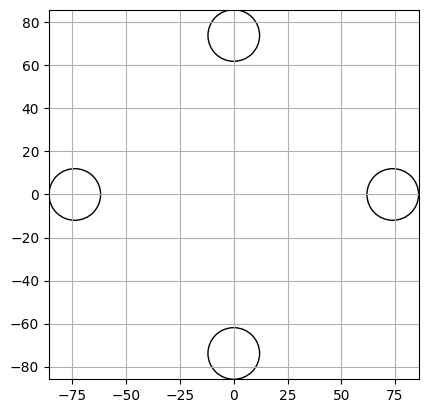

In [91]:
plot_radial_circles(stim_radius=12, n_stims=4, ring = 2, angle=90)
